#### Predicting mortality with heart failure from patients in ICU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [2]:
df = pd.read_csv('./ICU Patients.csv')
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


**Data Overview**

In [3]:
df.tail()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25
1176,2,107636,0.0,47,1,23.121384,1,0,0,1,...,135.285714,9.085714,93.857143,20.285714,2.566667,NaN,26.571429,NaN,NaN,55


In [4]:
df.shape

(1177, 51)

In [5]:
col = df.select_dtypes(include='float64').columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [7]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [8]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

**Data Preprocessing**

In [9]:
# Replacing empty spaces with an underscore

df.columns = df.columns.str.replace(' ', '_')
df

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [10]:
# categorical data in this dataset are the diseases related to the ICU patients
# numerical data in this dataset are the factors related to the ICU patients

numerical_features = [features for features in df.columns if len(df[features].unique())>5]
categorical_features = [features for features in df.columns if features not in numerical_features]

In [11]:
# Numerical features are the factors affecting if a patients will be alive or dead.

numerical_features

['ID',
 'age',
 'BMI',
 'heart_rate',
 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Respiratory_rate',
 'temperature',
 'SP_O2',
 'Urine_output',
 'hematocrit',
 'RBC',
 'MCH',
 'MCHC',
 'MCV',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Creatine_kinase',
 'Creatinine',
 'Urea_nitrogen',
 'glucose',
 'Blood_potassium',
 'Blood_sodium',
 'Blood_calcium',
 'Chloride',
 'Anion_gap',
 'Magnesium_ion',
 'PH',
 'Bicarbonate',
 'Lactic_acid',
 'PCO2',
 'EF']

In [12]:
# The diseases related to ICU patients

categorical_features

['group',
 'outcome',
 'gendera',
 'hypertensive',
 'atrialfibrillation',
 'CHD_with_no_MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal_failure',
 'COPD']

In [13]:
# It seems all the categorical data are not null
# We have to clean our numerical features that have null values
# We will do a simple impute by replacing them all by the mean of the available data in the column
for i in numerical_features:
    if df[i].isnull().sum()>1:
        df[i]=df[i].fillna(df[i].mean())


df
df.isnull().sum()

group                       0
ID                          0
outcome                     1
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [14]:
# We don't need the group and ID column in our model
df = df.drop(columns=['group', 'ID'], axis=1)

df.shape

(1177, 49)

In [15]:
# Checking for null values
df.isnull().sum()

outcome                     1
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

In [16]:
# Dropping the rows with null values
df = df.dropna(how='any', axis=0)
df

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,deficiencyanemias,depression,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55
1,0.0,75,2,30.188278,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500000,71.500000,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600000,75.000000,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.600000,50.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,7.378532,27.714286,1.853426,45.535382,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,7.378532,20.480000,1.853426,45.535382,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,7.378532,28.857143,1.853426,45.535382,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,7.378532,24.375000,1.853426,45.535382,25


In [17]:
# Again checking for null values

df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

In [18]:
# Looking at the number of death and life patients. 
# Where 1 represents death and 0 represents a patient is alive

df.outcome.value_counts()

outcome
0.0    1016
1.0     159
Name: count, dtype: int64

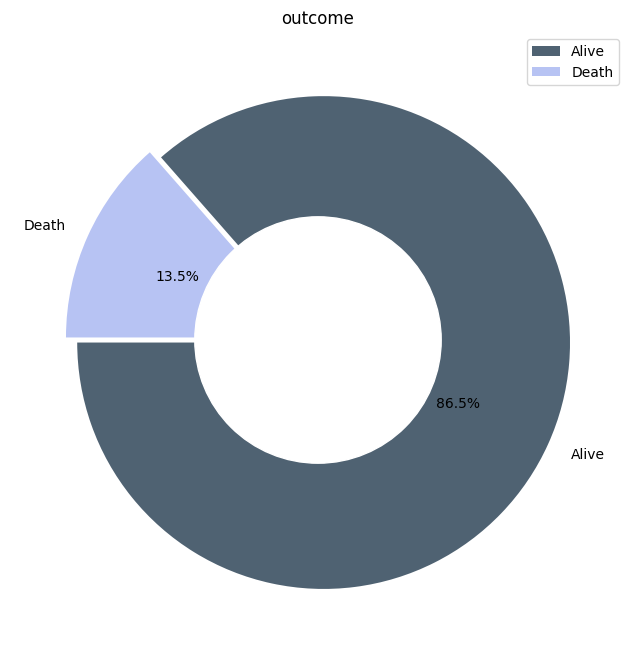

In [19]:
# Checking the number of patients dead and alive

plt.figure(figsize=(12,8))
plt.title("outcome")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.outcome.value_counts(), explode=(0.025,0.025),  labels=['Alive','Death'], colors=['#4F6272', '#B7C3F3'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

More then 15% patients died in the hospital and the remaining patients are alive  

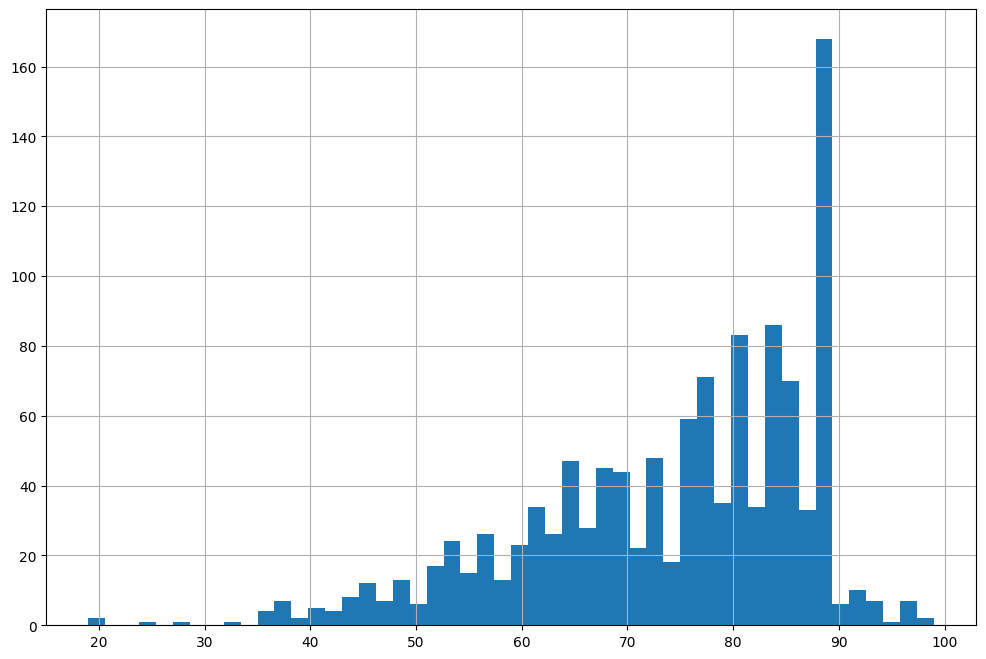

In [20]:
df.age.hist(bins = 50, figsize=(12,8))
plt.show()

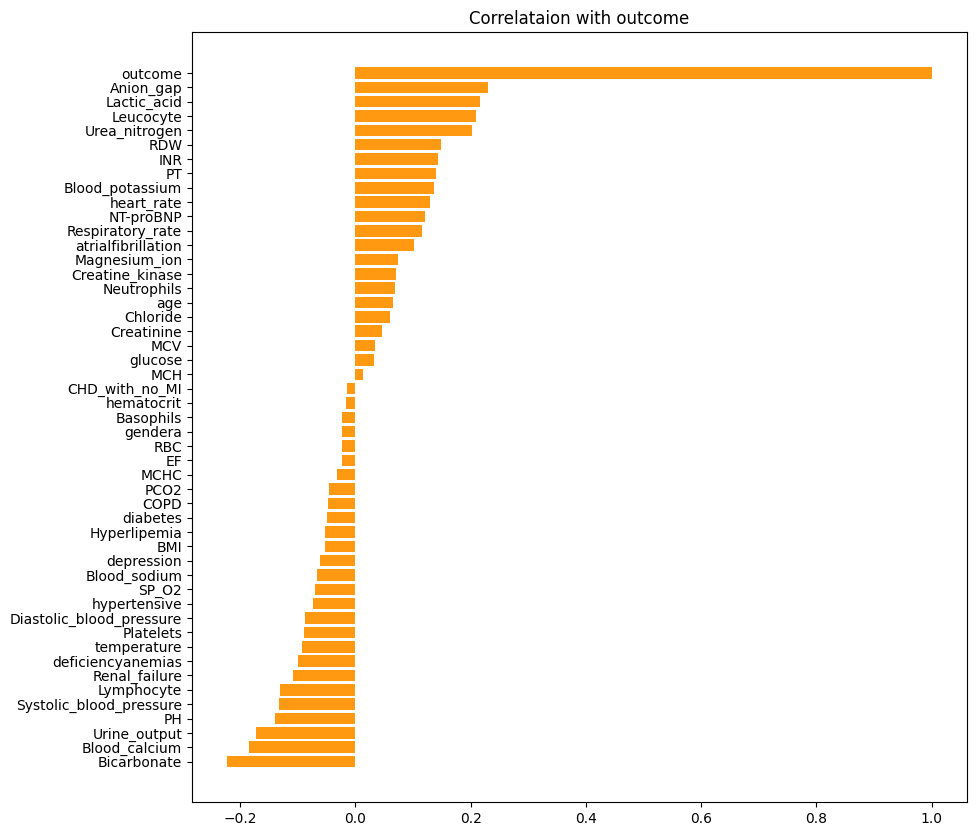

In [21]:
fig = plt.figure(figsize = (10, 10))
target_corr = pd.DataFrame(df.corr()['outcome'].sort_values(ascending = True))
plt.barh(target_corr.index, target_corr['outcome'],color="#FF9912")
plt.title('Correlataion with outcome')
plt.show()

<AxesSubplot: xlabel='hypertensive', ylabel='count'>

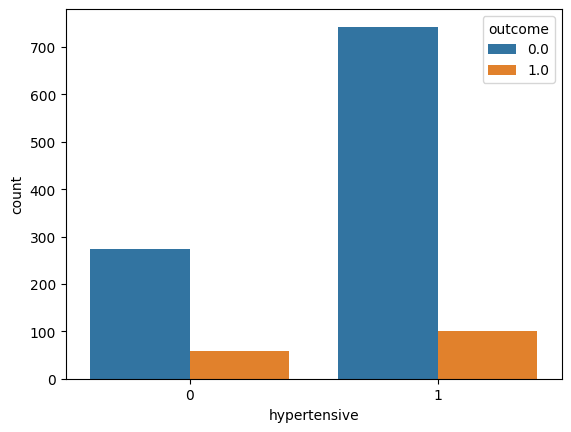

In [22]:
sns.countplot(data=df,x='hypertensive',hue='outcome')

<AxesSubplot: xlabel='age', ylabel='Count'>

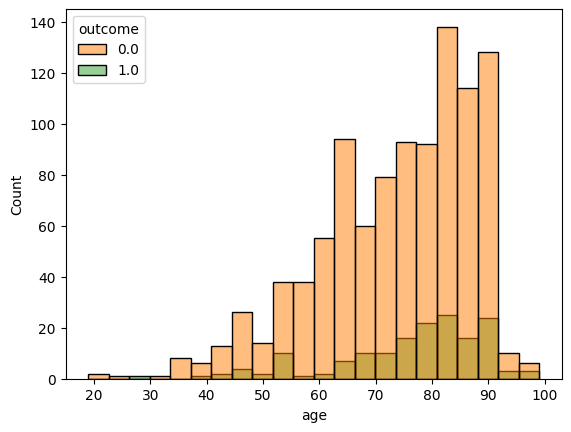

In [23]:
sns.histplot(data=df,x='age',hue='outcome',palette='Paired_r')

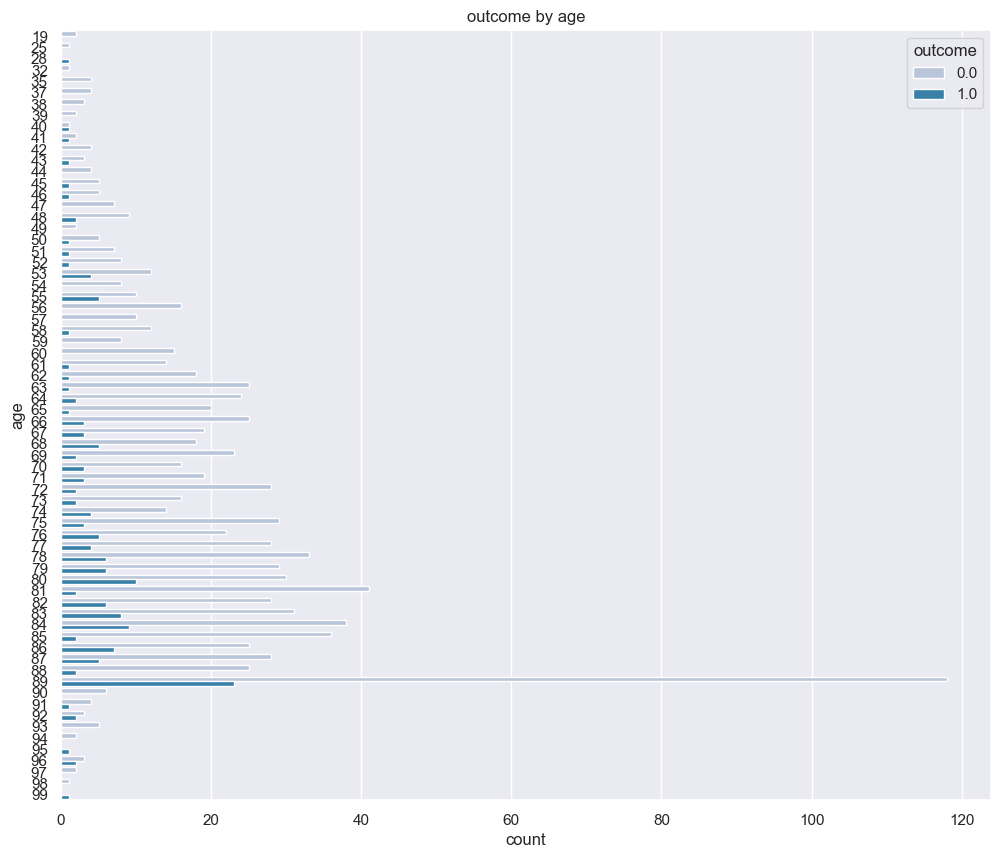

In [24]:
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid", color_codes=True)
ax = sns.countplot(y="age", hue="outcome", data=df, palette="PuBu")
plt.title("outcome by age")
plt.show()

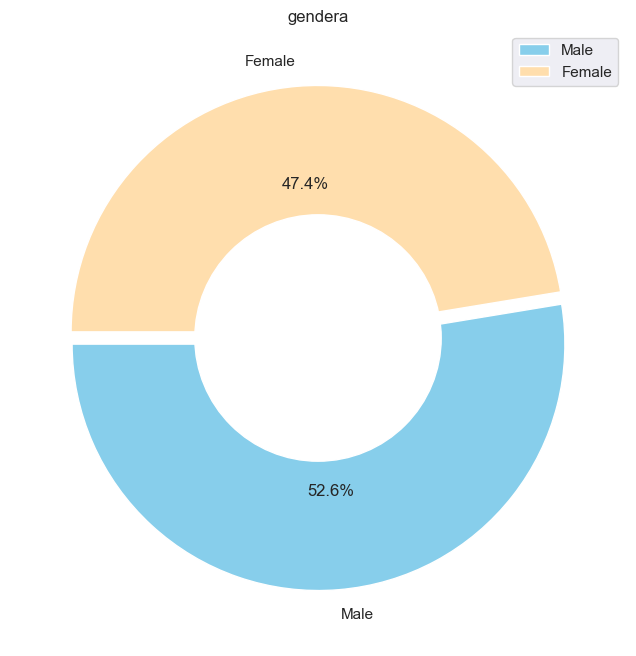

In [25]:
plt.figure(figsize=(12,8))
plt.title("gendera")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.gendera.value_counts(), explode=(0.025,0.025),  labels=['Male','Female'], colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

### Correlation

In [26]:
col = [ 'gendera', 'hypertensive','atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal_failure', 'COPD', 'outcome']

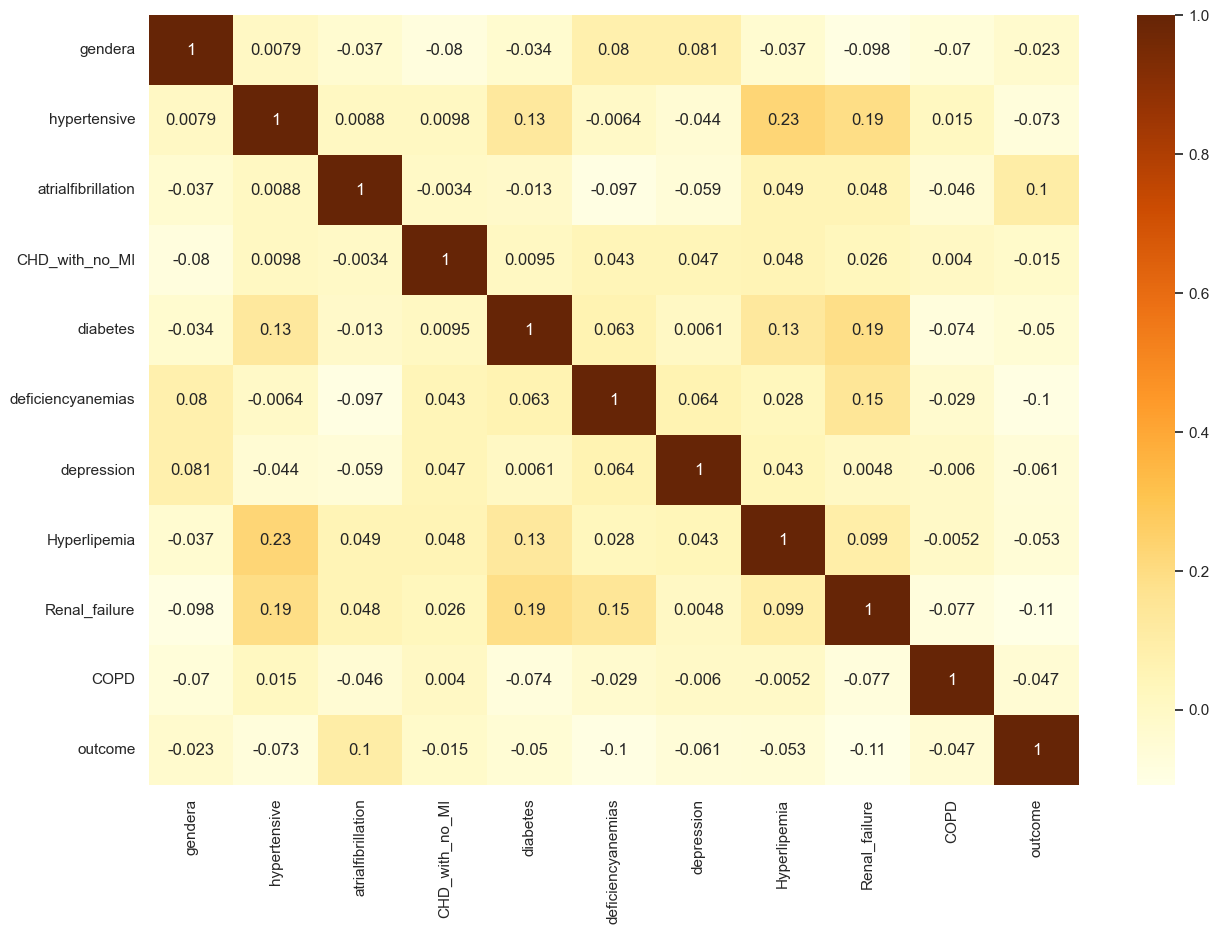

In [27]:
corr = df[col].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='YlOrBr');

## Cross Validation

In [28]:
from sklearn.model_selection import train_test_split
y = df.outcome
X = df.drop(columns=['outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print('The accuracy score is:', (accuracy)*100,'%')

The accuracy score is: 87.37113402061856 %


In [35]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Predictive model

In [42]:
from sklearn.preprocessing import StandardScaler

def predictive_system(features):
    ''' function decides if a patient will survive or not.'''
    input_data = np.array([features]).reshape(1, -1)
    input_data_scaler = standard_scaler.transform(input_data)
    pred = model.predict(input_data_scaler)
    if pred[0]==0.0:
        return 'Patient is likely to survive'
    else:
        return 'Patient is likely to die'

In [43]:
features = [76,1,24.26229342,1,1,0,0,1,0,1,1,1,74.18181818,118.1,52.95,20.54545455,35.26666667,96.81818182,1840,27.33333333,3.235,26.56666667,31.48333333,84.5,16.51666667,9.516666667,273,85.4,0.3,9.3,18.78333333,1.7,34183,28,1.6125,26.625,98.33333333,4.075,136.25,8.466666667,96.75,13.125,1.771428571,7.31,30.5,0.6,65.5,35]

result = predictive_system(features)
result

NameError: name 'standard_scaler' is not defined

In [38]:
from sklearn.metrics import confusion_matrix

number_train = 30
summ = 0
sum_mat = np.zeros((2,2))
for seed in range(number_train):
    # split traing and test data in two subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = seed)

    #instanciation of the decision tree
    model = RandomForestClassifier(max_depth=8, random_state=seed, class_weight=class_weight)

    #train the model
    model.fit(X_train, y_train)

    # get the models predicted outcome
    y_predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    sum_mat += confusion_matrix(y_test, y_predictions)
    summ += score

print('accuracy: ' + str(summ/number_train))
print("Confusion matrix:")
print(np.round_(sum_mat/number_train))

NameError: name 'RandomForestClassifier' is not defined